In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Section 1 - Data Preparation

In [31]:
# Loading the data 
#x_train
X = pd.read_csv('/home/raghav/codes new/Machine-Learning-from-scratch/01. Linear Regression/datasets/hardworkPaysOff/train/Linear_X_Train.csv')
#y_train
y = pd.read_csv('/home/raghav/codes new/Machine-Learning-from-scratch/01. Linear Regression/datasets/hardworkPaysOff/train/Linear_Y_Train.csv')
X.shape,y.shape

((3750, 1), (3750, 1))

In [32]:
X.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [33]:
y.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [34]:
# converting X and y into numpy arrays using .values
X = X.values
y = y.values


In [35]:
# Normalisation - substract by mean and divide by standard deviation
u = X.mean()
std = X.std()
X = (X-u)/std

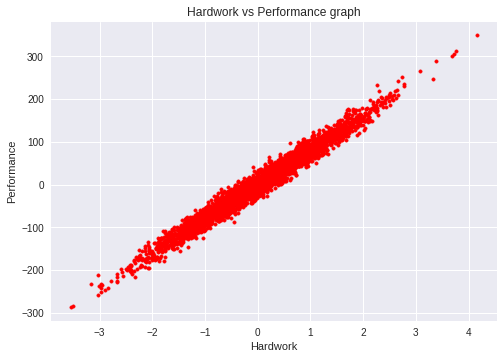

In [36]:
# Visualise
plt.style.use('seaborn')
plt.scatter(X,y,color='red',marker='.')
plt.title('Hardwork vs Performance graph')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show()

### Section 2 - Modelling

In [44]:
# Function to compute hypothesis (prediction)
def hypothesis(x,theta):
    #theta = [theta0,theta1]
    return theta[0] + theta[1]*x


# Function to find gradient
# capital X, capital Y denotes all values of X and Y
def gradient(X,Y,theta):
    m = X.shape[0]
    
    grad = np.zeros((2,))
    # grad = array([0., 0.])

    for i in range(m):
        x = X[i]
        y = Y[i]
        #y prediction
        y_ = hypothesis(x,theta)
        grad[0] += (y_ - y)
        grad[1] += (y_-y)*x
    return grad/m


def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
    return total_error/m
        
def gradientDescent(X,Y,max_step = 100, lr = 0.1):

    #initialise theta
    theta = np.zeros((2,))

    error_list = []
    
    for i in range(max_step):
        
        grad = gradient(X,Y,theta)

        e = error(X,Y,theta)
        error_list.append(e)
        
        #update theta
        theta[0] = theta[0] -  lr*grad[0]
        theta[1] = theta[1] -  lr*grad[1]
    return theta,error_list


In [45]:
theta, error_list = gradientDescent(X,y)

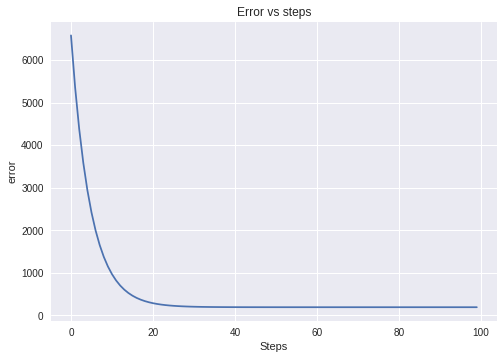

In [50]:
plt.style.use('seaborn')
plt.title("Error vs steps")
plt.xlabel("Steps")
plt.ylabel("error")
plt.plot(error_list)
plt.show()

### Section 3 - Prediction

In [52]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


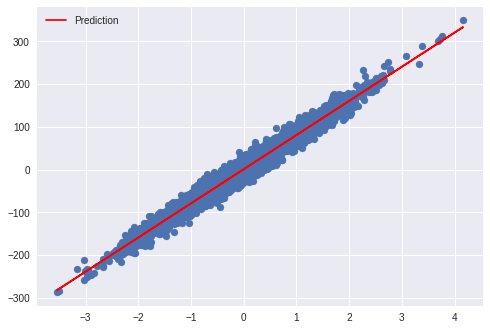

In [54]:
# Training data + Predictions
plt.scatter(X,y)
plt.plot(X,y_,color = 'red',label='Prediction')
plt.legend()
plt.show()

In [56]:
# Loading the test data
X_test = pd.read_csv('/home/raghav/codes new/Machine-Learning-from-scratch/01. Linear Regression/datasets/hardworkPaysOff/test/Linear_X_Test.csv').values
y_test_pred = hypothesis(X_test,theta)

In [57]:
y_test_pred.shape

(1250, 1)

In [58]:
y_test_pred

array([[-149.37069577],
       [ -68.75494042],
       [-201.48687035],
       ...,
       [  10.9121384 ],
       [ -21.53235759],
       [ -53.68460035]])

In [60]:
#creating submission file
df = pd.DataFrame(data = y_test_pred,columns=["y"])

In [61]:
df

,y
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897
...,...
1245,-12.744630
1246,75.171802
1247,10.912138
1248,-21.532358


In [62]:
df.to_csv('y_prediction_eg1.csv',index=False)

### Section 4 - Computing Score
Score : R2(R-Squared) or Coefficient of Determination

In [64]:
def r2_score(Y,Y_):
    #broadcasting will happen here
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y - Y.mean())**2)
    score = (1 - num/denom)
    return score*100

In [65]:
r2_score(y,y_)

97.09612226971643